In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
# # Creating a manageable v small list bc ...scared
# small_list = cities[:15]
# small_list

In [4]:
#API url want the current data in imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

#story cities with data into an empty list
city_with_data = []

#empty lists to store the data we want
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#counter to keep track of calls
counter = 0

# for looping through city list collected from citipy
for city in cities:
    
    #set up url w/ api key and city from city list and desired unit
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    #getting data
    city_response = requests.get(query_url)
    #turning data into a json
    city_json = city_response.json()
    
    #try and expect in case a city doesn't have data, loop will continue 
    try:
        #appending desired data for each city into empty lists
        city_data = city_json
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        city_with_data.append(city_data['name'])
        
        # Adding 1 to the counter 
        counter += 1
        # If counter is 51 it'll sleep for 50 seconds
        if counter == 51:
            time.sleep(60)
            print(f'Zzzz...Counter Reset')
            # Resetting counter to 1
            counter = 1
    
        # Printing each pull for each city
        print(f"This is pull {counter} for {city} data.")
    
    except KeyError:
        # Print for when there's no data in a city
        print(f"Oops, no data for {city}.")

    

This is pull 1 for pisco data.
This is pull 2 for busselton data.
This is pull 3 for kaitangata data.
This is pull 4 for ostrovnoy data.
This is pull 5 for butaritari data.
This is pull 6 for lengshuitan data.
This is pull 7 for hermanus data.
This is pull 8 for yellowknife data.
This is pull 9 for albany data.
This is pull 10 for champerico data.
This is pull 11 for nikolskoye data.
This is pull 12 for domoni data.
This is pull 13 for bibiani data.
Oops, no data for taolanaro.
This is pull 14 for mar del plata data.
This is pull 15 for cidreira data.
This is pull 16 for port-gentil data.
This is pull 17 for puerto escondido data.
This is pull 18 for bredasdorp data.
This is pull 19 for rikitea data.
This is pull 20 for bluff data.
This is pull 21 for salalah data.
This is pull 22 for purnia data.
This is pull 23 for lavrentiya data.
This is pull 24 for hilo data.
This is pull 25 for geraldton data.
This is pull 26 for arraial do cabo data.
Oops, no data for chagda.
This is pull 27 for

This is pull 17 for dasoguz data.
This is pull 18 for kavaratti data.
This is pull 19 for ayan data.
This is pull 20 for clyde river data.
Oops, no data for kuche.
This is pull 21 for puerto quijarro data.
This is pull 22 for olafsvik data.
This is pull 23 for kirkcudbright data.
This is pull 24 for kloulklubed data.
Oops, no data for cheuskiny.
This is pull 25 for araouane data.
This is pull 26 for kulashi data.
This is pull 27 for grafton data.
This is pull 28 for daru data.
This is pull 29 for gyomro data.
This is pull 30 for shingu data.
This is pull 31 for monrovia data.
This is pull 32 for camacha data.
This is pull 33 for batticaloa data.
This is pull 34 for mildura data.
This is pull 35 for finschhafen data.
This is pull 36 for san antero data.
This is pull 37 for cetraro data.
This is pull 38 for najran data.
This is pull 39 for hasaki data.
This is pull 40 for fengrun data.
This is pull 41 for guane data.
This is pull 42 for elliot lake data.
This is pull 43 for tomatlan data

This is pull 31 for spokane data.
This is pull 32 for williamsburg data.
This is pull 33 for pergamino data.
This is pull 34 for kristianstad data.
This is pull 35 for ovalle data.
This is pull 36 for kristiinankaupunki data.
This is pull 37 for shelburne data.
This is pull 38 for haimen data.
This is pull 39 for kyra data.
This is pull 40 for shache data.
This is pull 41 for mandalgovi data.
Oops, no data for andarab.
This is pull 42 for takestan data.
This is pull 43 for aksarka data.
This is pull 44 for maumere data.
This is pull 45 for bulungu data.
This is pull 46 for muroto data.
This is pull 47 for ryotsu data.
This is pull 48 for melong data.
Oops, no data for dianopolis.
This is pull 49 for los llanos de aridane data.
Oops, no data for gurdaspur.
This is pull 50 for catamarca data.
Zzzz...Counter Reset
This is pull 1 for seoul data.
This is pull 2 for aripuana data.
This is pull 3 for didsbury data.
Oops, no data for sentyabrskiy.
Oops, no data for yanchukan.
This is pull 4 fo

In [5]:
# Dictionary that'll become dataframe
city_dict = {
    "city" : city_with_data,
    "lat" : lat,
    "lng" : lng,
    "max temp" : max_temp,
    "humidity" : humidity,
    "cloudiness" : cloudiness,
    "wind speed" : wind_speed,
    "country id" : country,
    "date" : date
}

# Dataframe
city_df = pd.DataFrame(city_dict)
city_df.head()


,city,lat,lng,max temp,humidity,cloudiness,wind speed,country id,date
0,Pisco,-13.7000,-76.2167,70.02,85,97,9.08,PE,1643580095
1,Busselton,-33.6500,115.3333,64.09,64,90,18.16,AU,1643580351
2,Kaitangata,-46.2817,169.8464,68.94,75,16,0.29,NZ,1643580341
3,Ostrovnoy,68.0531,39.5131,12.16,95,98,8.23,RU,1643580351
4,Butaritari,3.0707,172.7902,82.04,76,17,20.92,KI,1643580352


In [6]:
# Outputting dataframe
city_df.to_csv('output_data/weatherpy_data.csv', encoding="utf-8", index = False)

In [7]:
# city_df.info()

In [8]:
# Summary stats of numerical data 
city_summary = city_df.describe()

city_summary

,lat,lng,max temp,humidity,cloudiness,wind speed,date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,21.884790,18.171415,47.772272,72.347048,59.601073,8.759875,1.643581e+09
std,33.686756,91.386312,32.175833,22.083690,40.175467,6.923512,2.668280e+02
min,-54.800000,-179.166700,-34.420000,10.000000,0.000000,0.000000,1.643580e+09
25%,-4.175200,-65.070400,25.880000,59.000000,19.000000,3.655000,1.643580e+09
50%,25.500000,20.647300,59.520000,76.000000,75.000000,6.910000,1.643581e+09
75%,50.285000,100.586400,74.940000,90.000000,100.000000,11.930000,1.643581e+09
max,78.218600,179.316700,98.080000,100.000000,100.000000,44.900000,1.643581e+09


In [10]:
# Checking if and values are over 100 and dropping them 
over_hun = city_df.loc[city_df["humidity"] > 100]
city_df = city_df.loc[city_df["humidity"] != 100]

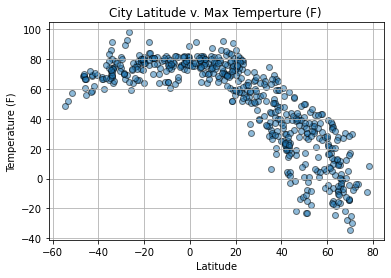

In [26]:
# Creating a scatter plot of City Lat & Max Temp
plt.scatter(city_df["lat"], city_df["max temp"], alpha = 0.5, edgecolor = "black")
# Adding grid
plt.grid()

# Adding labels
plt.title('City Latitude v. Max Temperture (F) ')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Saving
plt.savefig("output_data/city_lat_temp.png")

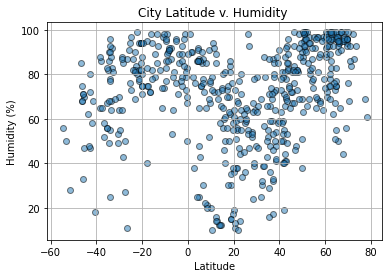

In [27]:
# Creating a scatter plot of City Lat & Humidity 
plt.scatter(city_df["lat"], city_df["humidity"], alpha = 0.5, edgecolor = "black")
plt.grid()

#Adding Labels 
plt.title('City Latitude v. Humidity ')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Saving
plt.savefig("output_data/city_lat_humidity.png")

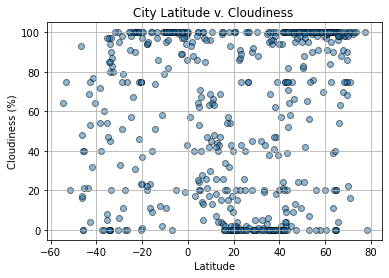

In [14]:
# Creating a scatter plot of City Lat & Cloudiness 
plt.scatter(city_df["lat"], city_df["cloudiness"], alpha = 0.5, edgecolor = "black")
plt.grid()

# Adding labels
plt.title('City Latitude v. Cloudiness ')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Saving
plt.savefig("output_data/city_lat_cloudiness.png")

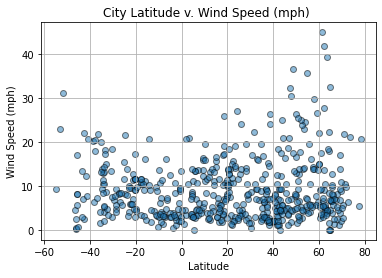

In [15]:
# Creating a scatter plot of City Lat & Wind Speed
plt.scatter(city_df["lat"], city_df["wind speed"], alpha = 0.5, edgecolor = "black")
plt.grid()

# Adding labels
plt.title('City Latitude v. Wind Speed (mph) ')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Saving
plt.savefig("output_data/city_lat_windspeed.png")

In [32]:
# IDing cities in the northern hemisphere
northernhem = city_df.loc[(city_df["lat"] >= 0)]

In [33]:
# IDing cities in the southern hempisphere
southernhem = city_df.loc[(city_df["lat"] <= 0)]

The r-squared is: 0.7457542666569126


Text(0, 20, 'y = -1.32x +90.61')

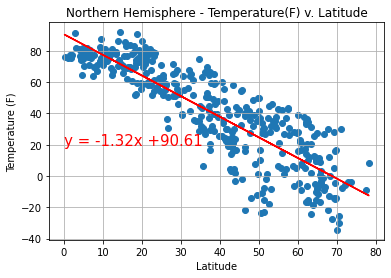

In [18]:
# Northern Hemisphere - Temperature (F) vs. Latitude

# Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["max temp"])

# Regression line
regression_values = (northernhem["lat"] * slope) + intercept 

# String of regression line for plotting
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plotting
plt.scatter(northernhem["lat"], northernhem["max temp"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

# Adding labels
plt.title("Northern Hemisphere - Temperature(F) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (0, 20), fontsize = 15, color = "red")


The r-squared is: 0.21629652528793988


Text(-50, 55, 'y= 0.26x +79.94')

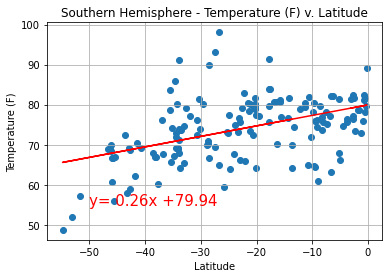

In [19]:
# Southern Hemisphere - Temperature (F) vs. Latitude

# Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["max temp"])

# Regression line
regression_values = (southernhem["lat"] * slope) + intercept

# String of regression line for plotting
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plotting
plt.scatter(southernhem["lat"], southernhem["max temp"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

# Adding labels
plt.title("Southern Hemisphere - Temperature (F) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq, (-50, 55), fontsize = 15, color = "red")

The r-squared is: 0.2060266017770084


Text(40, 20, 'y = 0.52x +49.41')

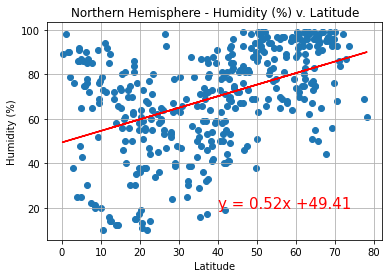

In [20]:
# Northern Hemisphere - Humidity (%) vs. Latitude

# Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["humidity"])

# Regression line
regression_values = (northernhem["lat"] * slope) + intercept 

# String of regression line for plotting
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plotting
plt.scatter(northernhem["lat"], northernhem["humidity"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

# Adding labels
plt.title("Northern Hemisphere - Humidity (%) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (40, 20), fontsize = 15, color = "red")

The r-squared is: 0.19068228979765312


Text(-30, 40, 'y= 0.54x +88.19')

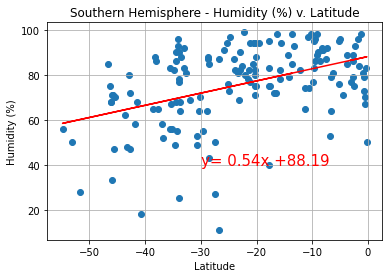

In [21]:
# Southern Hemisphere - Humidity (%) vs. Latitude

# Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["humidity"])

# Regression line
regression_values = (southernhem["lat"] * slope) + intercept

# String of regression line for plotting
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plotting
plt.scatter(southernhem["lat"], southernhem["humidity"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

# Adding labels
plt.title("Southern Hemisphere - Humidity (%) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (-30, 40), fontsize = 15, color = "red")

The r-squared is: 0.1256082464783529


Text(40, 40, 'y = 0.73x +27.88')

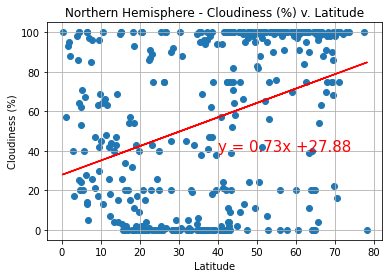

In [22]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

# Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["cloudiness"])

# Regression line
regression_values = (northernhem["lat"] * slope) + intercept 

# String of regression line for plotting
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plotting
plt.scatter(northernhem["lat"], northernhem["cloudiness"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

# Adding labels
plt.title("Northern Hemisphere - Cloudiness (%) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (40, 40), fontsize = 15, color = "red")

The r-squared is: 0.16922656611590964


Text(-50, 60, 'y= 1.09x +89.63')

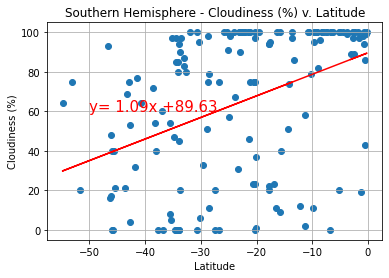

In [23]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

# Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["cloudiness"])

# Regression line
regression_values = (southernhem["lat"] * slope) + intercept

# String of regression line for plotting
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plotting
plt.scatter(southernhem["lat"], southernhem["cloudiness"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

# Adding labels
plt.title("Southern Hemisphere - Cloudiness (%) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (-50, 60), fontsize = 15, color = "red")

The r-squared is: 0.008714650962451671


Text(10, 25, 'y = 0.03x +7.86')

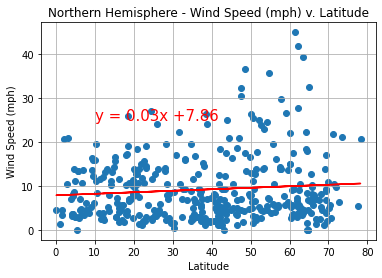

In [24]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

# Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["wind speed"])

# Regression line
regression_values = (northernhem["lat"] * slope) + intercept 

# String of regression line for plotting
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plotting
plt.scatter(northernhem["lat"], northernhem["wind speed"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

# Adding labels
plt.title("Northern Hemisphere - Wind Speed (mph) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (10, 25), fontsize = 15, color = "red")

The r-squared is: 0.10759315159217837


Text(-32, 25, 'y= -0.13x +5.45')

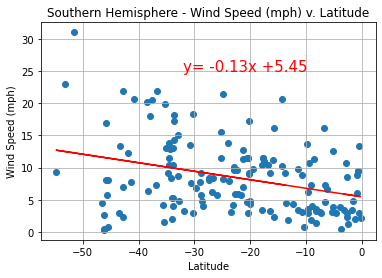

In [25]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

# Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["wind speed"])

# Regression line
regression_values = (southernhem["lat"] * slope) + intercept

# String of regression line for plotting
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plotting
plt.scatter(southernhem["lat"], southernhem["wind speed"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

# Adding labels
plt.title("Southern Hemisphere - Wind Speed (mph) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (-32, 25), fontsize = 15, color = "red")

# Observations

There appears to be a correlation between temperture and latitude in the 
Northern Hemispheres. The r value for the Northern Hemisphere is 
0.75 and in the Southern Hemisphere it is 0.21. The r-value being higher for 
the Northern Hemisphere could be due to the fact that there are more data points 
for the Northern Hemisphere than for the Southern Hemispere. 

On the otherhand there appers to be a very weak correlation between wind speed and
latitude in the Northern Hemisphere. The r-squared value there is 0.008. Whereas,
the Southern Hemisphere has and r-sqaured value of 0.107, I would again point to
the smaller subset for the Southern Hemisphere. Similarly, there is a weak 
correlation between cloudiness and latitude for both Northern and Southern 
Hemispheres. 
